<a href="https://colab.research.google.com/github/TheClassicTechno/cleansea_model/blob/main/bestalso_version/Taco_Custom_Dataset_CNN_Model_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Taco Revised Dataset CNN Model

achieved >95% accuracy consistently on the Taco Custom Dataset.

##mount drive to access dataset

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##import necessary libraries

In [40]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import pathlib
import cv2
import glob




##accessing paths of all 4 debris types + split entire Taco Dataset into train and validation 80-20 split

In [41]:
#processing images
bottles1 = '/content/drive/MyDrive/TEAM9SURESTART/taco/bottles'
cans1 = '/content/drive/MyDrive/TEAM9SURESTART/taco/cans'
containers1 = '/content/drive/MyDrive/TEAM9SURESTART/taco/containers'
#paper1 = '/content/drive/MyDrive/TEAM9SURESTART/taco/paper'
plastic1 = '/content/drive/MyDrive/TEAM9SURESTART/taco/plastic'

bottles = [cv2.imread(image) for image in glob.glob(bottles1)]
cans = [cv2.imread(image) for image in glob.glob(cans1)]
containers = [cv2.imread(image) for image in glob.glob(containers1)]
#paper = [cv2.imread(image) for image in glob.glob(paper1)]
plastic = [cv2.imread(image) for image in glob.glob(plastic1)]

train_dataset = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/TEAM9SURESTART/taco',
    validation_split = 0.2,
    subset = "training",
    seed = 24,  
    image_size = (256, 256),
    batch_size = 8
)

val_dataset = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/TEAM9SURESTART/taco',
    validation_split = 0.2,
    subset = "validation",
    seed = 24,  
    image_size = (256, 256),
    batch_size = 8
)





train_dataset = train_dataset.cache().shuffle(13).prefetch(buffer_size = tf.data.AUTOTUNE)
val_dataset = val_dataset.cache().shuffle(13).prefetch(buffer_size = tf.data.AUTOTUNE)


Found 230 files belonging to 4 classes.
Using 184 files for training.
Found 230 files belonging to 4 classes.
Using 46 files for validation.


##model architecture

###includes rescaling of input image shapes

In [42]:

model = Sequential ([
    
    
    layers.Rescaling(1./255, input_shape = (256, 256, 3)),
    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(4, activation = 'softmax')
])
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_13 (Rescaling)    (None, 256, 256, 3)       0         
                                                                 
 conv2d_39 (Conv2D)          (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 128, 128, 16)     0         
 g2D)                                                            
                                                                 
 dropout_39 (Dropout)        (None, 128, 128, 16)      0         
                                                                 
 conv2d_40 (Conv2D)          (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                

##train model with 150 epochs and save model as .h5 model for later mobile app deployment conveniently

In [43]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])
'''
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=['accuracy'],  run_eagerly=True
)

'''
model.fit (
    train_dataset, 
    validation_data = val_dataset,
    epochs = 150
)
model.save('model.h5')

Epoch 1/150


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


23/23 [==============================] - 1s 22ms/step - loss: 1.6768 - accuracy: 0.3641 - val_loss: 1.3516 - val_accuracy: 0.4565
Epoch 2/150
23/23 [==============================] - 0s 9ms/step - loss: 1.3164 - accuracy: 0.4620 - val_loss: 1.3406 - val_accuracy: 0.4565
Epoch 3/150
23/23 [==============================] - 0s 9ms/step - loss: 1.2820 - accuracy: 0.4620 - val_loss: 1.3092 - val_accuracy: 0.4565
Epoch 4/150
23/23 [==============================] - 0s 8ms/step - loss: 1.2625 - accuracy: 0.4620 - val_loss: 1.3485 - val_accuracy: 0.4565
Epoch 5/150
23/23 [==============================] - 0s 9ms/step - loss: 1.2356 - accuracy: 0.4620 - val_loss: 1.2751 - val_accuracy: 0.4565
Epoch 6/150
23/23 [==============================] - 0s 9ms/step - loss: 1.2142 - accuracy: 0.4728 - val_loss: 1.2339 - val_accuracy: 0.4565
Epoch 7/150
23/23 [==============================] - 0s 9ms/step - loss: 1.2047 - accuracy: 0.5054 - val_loss: 1.2256 - val_accuracy: 0.4565
Epoch 8/150
23/23 [=====

##visualize train and validation loss and accuracy curves

Text(0.5, 1.0, 'Training-Validation Accuracy')

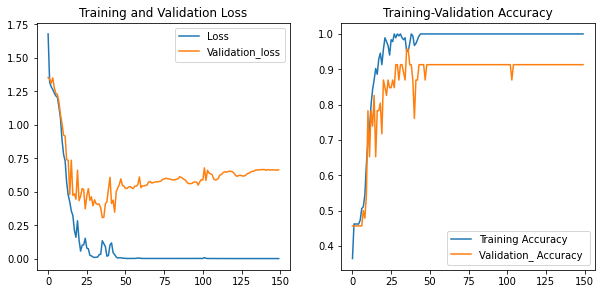

In [44]:
loss = pd.DataFrame(model.history.history)

#plotting the loss and accuracy 
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(loss["loss"], label ="Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(2,2,2)
plt.plot(loss['accuracy'],label = "Training Accuracy")
plt.plot(loss['val_accuracy'], label ="Validation_ Accuracy ")
plt.legend()
plt.title("Training-Validation Accuracy")